In [10]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [92]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')
data_gender_submission = pd.read_csv('data/gender_submission.csv')

In [93]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
df = data_train.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [95]:
y = data_train.Survived

In [96]:
X = pd.get_dummies(df)

In [97]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [98]:
X.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [99]:
X = X.fillna({'Age': X.Age.median()})

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [117]:
parametrs = {'min_samples_leaf': range(1,10), 'max_depth': range(5,10), 'min_samples_split': range(2,15)}

In [118]:
random_forest_clf = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)

In [119]:
grid_search_cv_forest_clf = GridSearchCV(random_forest_clf, parametrs, cv=5)

In [120]:
grid_search_cv_forest_clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=50, random_state=0),
             param_grid={'max_depth': range(5, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 15)})

In [121]:
grid_search_cv_forest_clf.best_params_

{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [122]:
best_forest_clf = grid_search_cv_forest_clf.best_estimator_

In [123]:
y_pred = best_forest_clf.predict(X_test)

In [124]:
from sklearn.metrics import RocCurveDisplay, precision_score, recall_score, accuracy_score

In [125]:
#Урежем True class
y_pred_prob = best_forest_clf.predict_proba(X_test)
y_pred = np.where(y_pred_prob[:, 1] > 0.5, 1, 0)

In [126]:
precision_score(y_test, y_pred)

0.8

In [127]:
recall_score(y_test, y_pred)

0.7142857142857143

In [128]:
accuracy_score(y_test, y_pred)

0.8251121076233184

<AxesSubplot:>

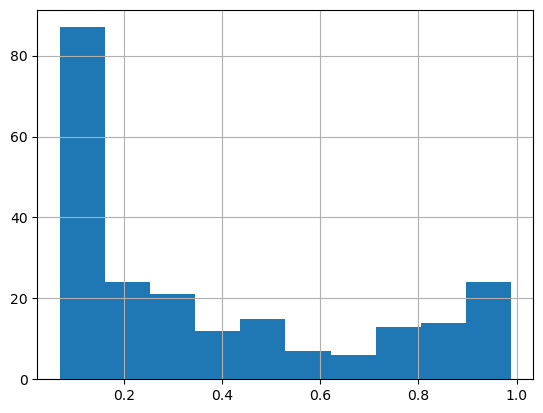

In [42]:
pd.Series(y_pred_prob[:, 1]).hist()

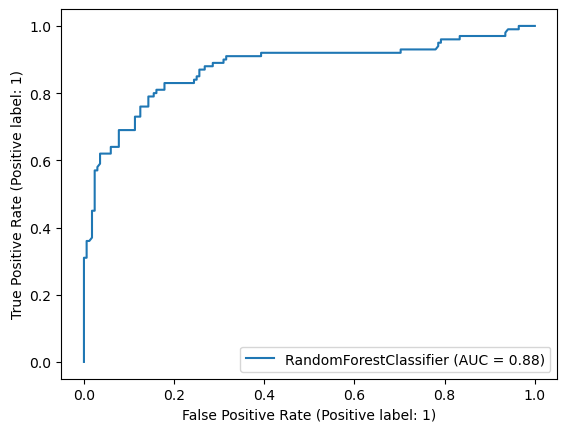

In [416]:
RocCurveDisplay.from_estimator(best_forest_clf, X_test, y_test)

In [391]:
feature_scores = pd.Series(best_forest_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Sex_male      0.206433
Age           0.178225
Fare          0.174277
Sex_female    0.170131
Pclass        0.114035
SibSp         0.066586
Parch         0.042593
Embarked_S    0.018614
Embarked_C    0.014870
Embarked_Q    0.014237
dtype: float64

<AxesSubplot:>

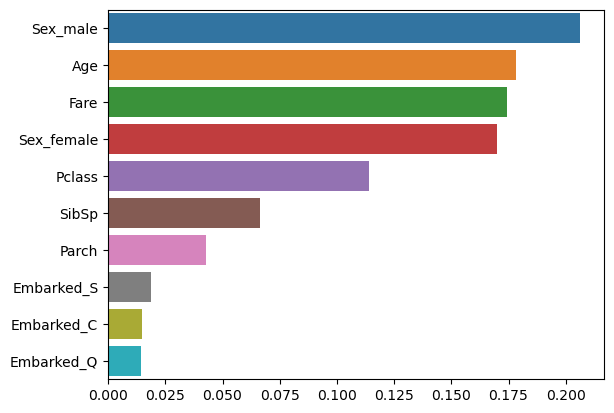

In [392]:
sns.barplot(x=feature_scores, y=feature_scores.index)

In [7]:
from platform import python_version

print(python_version())

3.10.9


In [8]:
!pip3 install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 10.7/10.7 MB 6.5 MB/s eta 0:00:00
     ------------------------------------ 341.8/341.8 kB 663.2 kB/s eta 0:00:00


In [11]:
pd.__version__

'2.0.1'